# Building A Scikit Learn Classification Pipeline

https://www.kaggle.com/gautham11/building-a-scikit-learn-classification-pipeline

위 글을 보고 따라하며 연습해본 내용입니다. iris 데이터를 사용합니다. 나는 따라쟁이 우후훗

In [24]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
df = pd.DataFrame(iris.data)

In [12]:
df.columns = list(iris.feature_names)

In [13]:
df['Species'] = iris.target

In [14]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.7/site-packages/

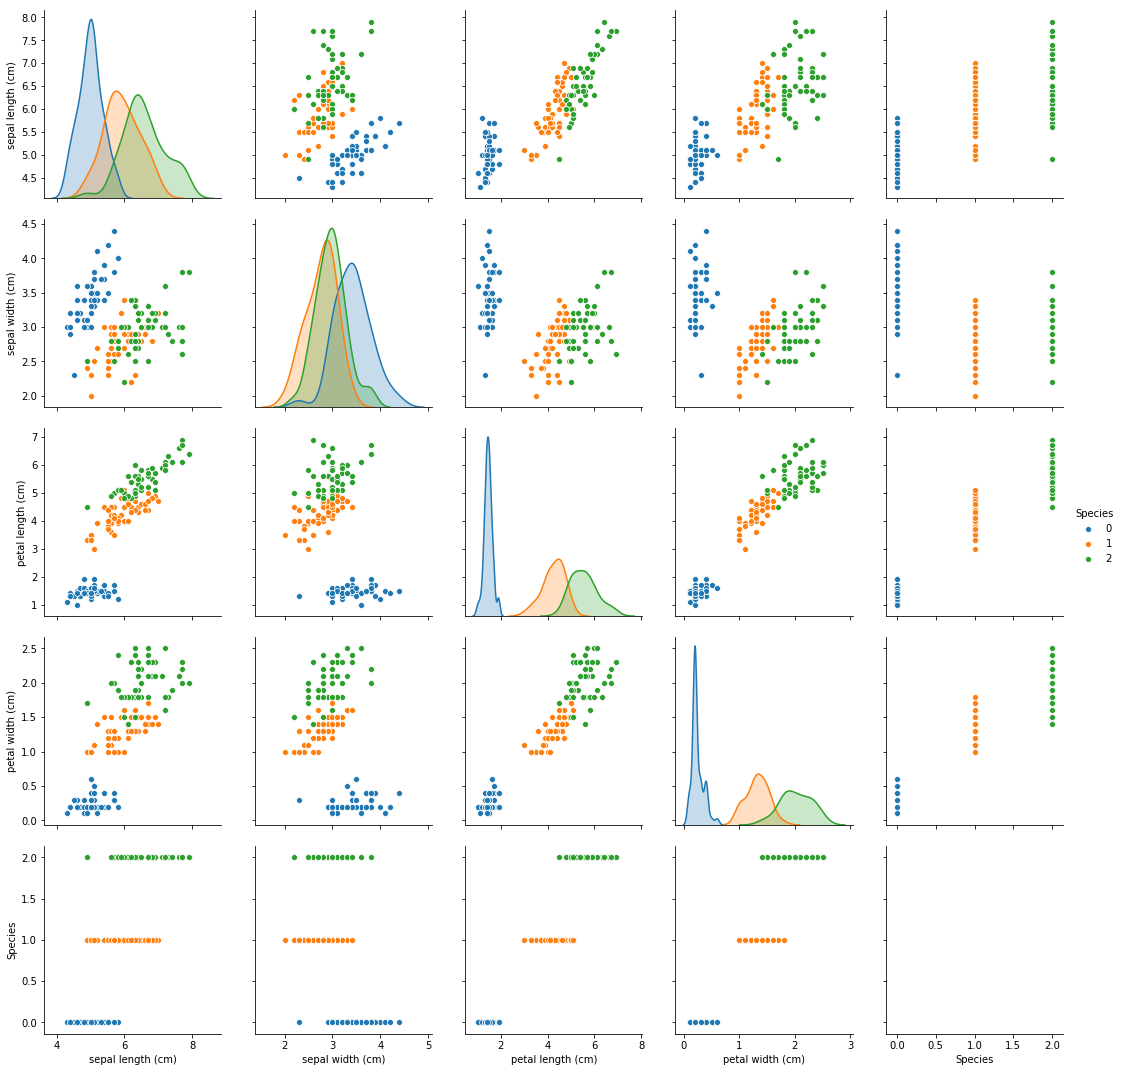

In [7]:
sns.pairplot(df, hue='Species', size=3)

### 파이프라인 만들기
2단계에 걸쳐 간단한 파이프라인을 만들어 보겠습니다.
- 1단계: `StandardScaler()` 로 수치를 정규화합니다.
- 2단계: `KNearestClassifier()` 클래시파이어를 돌립니다.

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), # 1단계
    ('clf', LogisticRegression()) # 2단계
])

In [17]:
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))]

이어 트레인 데이터와 테스트 데이터를 나누겠습니다.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1].values,
                                                    df['Species'],
                                                    test_size = 0.4,
                                                    random_state = 10)                                                       

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 4), (60, 4), (90,), (60,))

In [32]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([0.00190115, 0.0016439 , 0.00117922]),
 'score_time': array([0.00067711, 0.00040603, 0.00040603]),
 'test_score': array([0.83870968, 0.87096774, 0.92857143]),
 'train_score': array([0.91525424, 0.88135593, 0.88709677])}

In [34]:
scores['test_score'].mean()

0.8794162826420892

파이프라인에 아래 분류 알고리즘들 넣기
- LogisticRegression
- Support Vector Machines - linear and rbf
- K-nearest Classifier
- Decision Tree Classifier
- Gradient Bossting Classifier

In [35]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [39]:
clfs = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
]
clfs

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=3, p=2,
            weights='uniform'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state

In [52]:
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('----------')
    print(str(classifier))
    print('----------')
    for key, values in scores.items():
        print(key, ' mean ', values.mean())
        print(key, ' std ', values.std())

----------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
----------
fit_time  mean  0.0018170674641927083
fit_time  std  0.0005490479242745901
score_time  mean  0.00046324729919433594
score_time  std  4.424875834251448e-05
test_score  mean  0.8794162826420892
test_score  std  0.03716913558391048
train_score  mean  0.894568981228358
train_score  std  0.01481326388484137
----------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
----------
fit_time  mean  0.003064711888631185
fit_time  std  0.0010635286785386764
score_time  mean  0.0011639595031738281
score_time  std  8.176146794475573e-05

SVC가 95.58%로 가장 높은 정확도를 보이기 때문에 SVC를 선택합니다.

### 교차 검증과 하이퍼 파라미터 튜닝하기
- 교차 검증으로 최적의 파라미터 조합을 찾습니다.

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
pipeline.set_params(clf = SVC())
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))]

In [57]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__kernel' : ['linear', 'rbf'],
    'clf__C' : np.linspace(0.1,1.2,12)
})

cv_grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__kernel': ['linear', 'rbf'], 'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

`best_params_` 를 이용해 최적의 파라미터 조합을 확인할 수 있습니다.

In [58]:
cv_grid.best_params_

{'clf__C': 0.2, 'clf__kernel': 'linear'}

In [59]:
cv_grid.best_estimator_

Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [60]:
cv_grid.best_score_

0.9777777777777777

In [61]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

In [64]:
print('Accuracy of the best classifier after CV is {}%'.format(accuracy*100))

Accuracy of the best classifier after CV is 95.0%
